In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "puglia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,16,Puglia,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,16,Puglia,1,0,1,2,3,2,2,...,0.0,242.0,0.0,2.0,0.00,33.33,0.83,0.00,0.00,200.000
4,2020-02-29T17:00:00,16,Puglia,1,0,1,2,3,0,0,...,0.0,10.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2020-11-14T17:00:00,16,Puglia,1289,178,1467,22533,24000,1489,1741,...,16.0,9745.0,7020.0,1429.0,12.13,6.11,17.87,24.80,12.66,7.734
264,2020-11-15T17:00:00,16,Puglia,1261,180,1441,23261,24702,702,905,...,12.0,6070.0,3292.0,728.0,12.49,5.83,14.91,27.49,1.12,3.771
265,2020-11-16T17:00:00,16,Puglia,1295,182,1477,24048,25525,823,1044,...,36.0,4425.0,2381.0,787.0,12.32,5.79,23.59,43.85,1.11,4.226
266,2020-11-17T17:00:00,16,Puglia,1316,181,1497,25110,26607,1082,1234,...,36.0,6228.0,5638.0,1062.0,12.09,5.63,19.81,21.89,-0.55,4.834


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 18, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1368
Nuovi tamponi: 10265.0
Percentuale nuovi positivi/nuovi tamponi: 13.3 %
Nuovi guariti: 333.0
Nuovi deceduti: 28.0
Variazione positivi ricoverati con sintomi: 4.0
Variazione positivi in terapia intensiva: 17.0
Variazione positivi in isolamento dimiciliare: 986.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 18, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-19T17:00:00,16,Puglia,201,13,214,1874,2088,102,108,...,1.0,3717.0,2545.0,100.0,6.07,10.25,2.91,4.24,8.33,5.438
1,2020-09-20T17:00:00,16,Puglia,199,11,210,1918,2128,40,50,...,1.0,2777.0,1590.0,44.0,5.24,9.87,1.80,3.14,-15.38,2.395
2,2020-09-21T17:00:00,16,Puglia,201,11,212,1977,2189,61,81,...,1.0,1895.0,1537.0,59.0,5.19,9.68,4.27,5.27,0.00,3.806
3,2020-09-22T17:00:00,16,Puglia,204,10,214,1976,2190,1,67,...,1.0,4516.0,2681.0,-1.0,4.67,9.77,1.48,2.50,-9.09,3.061
4,2020-09-23T17:00:00,16,Puglia,204,10,214,2008,2222,32,89,...,2.0,4014.0,2859.0,32.0,4.67,9.63,2.22,3.11,0.00,4.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-14T17:00:00,16,Puglia,1289,178,1467,22533,24000,1489,1741,...,16.0,9745.0,7020.0,1429.0,12.13,6.11,17.87,24.80,12.66,7.734
57,2020-11-15T17:00:00,16,Puglia,1261,180,1441,23261,24702,702,905,...,12.0,6070.0,3292.0,728.0,12.49,5.83,14.91,27.49,1.12,3.771
58,2020-11-16T17:00:00,16,Puglia,1295,182,1477,24048,25525,823,1044,...,36.0,4425.0,2381.0,787.0,12.32,5.79,23.59,43.85,1.11,4.226
59,2020-11-17T17:00:00,16,Puglia,1316,181,1497,25110,26607,1082,1234,...,36.0,6228.0,5638.0,1062.0,12.09,5.63,19.81,21.89,-0.55,4.834


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

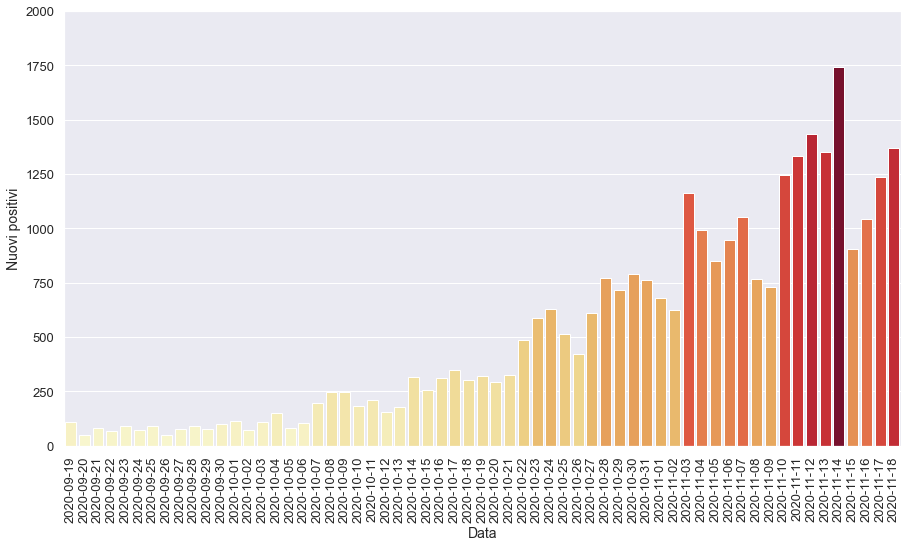

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

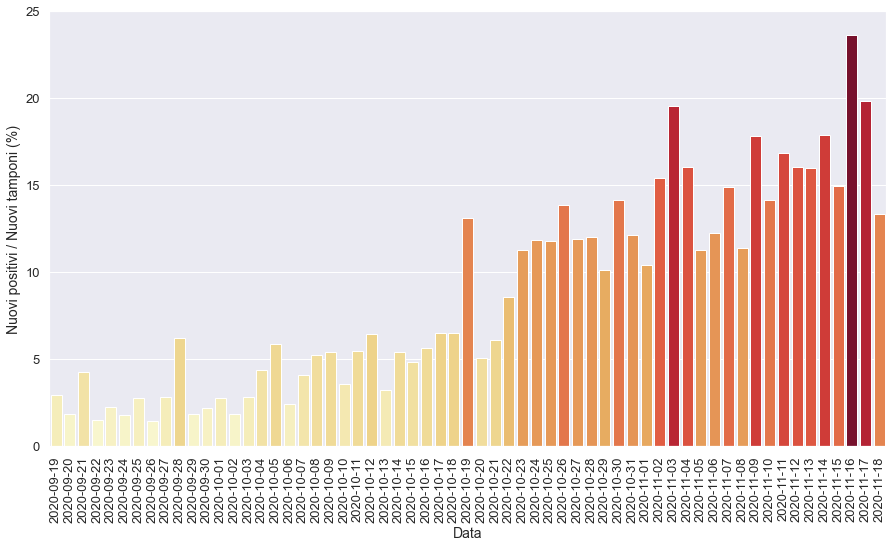

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

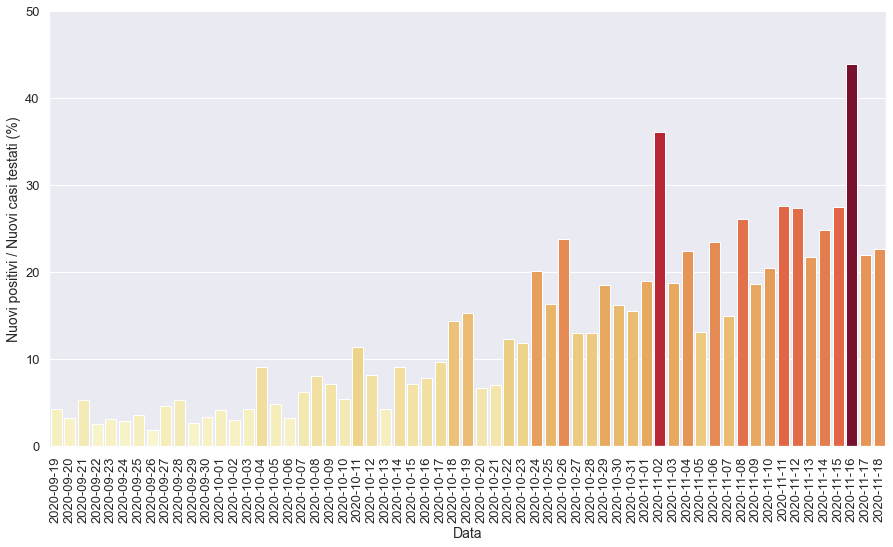

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

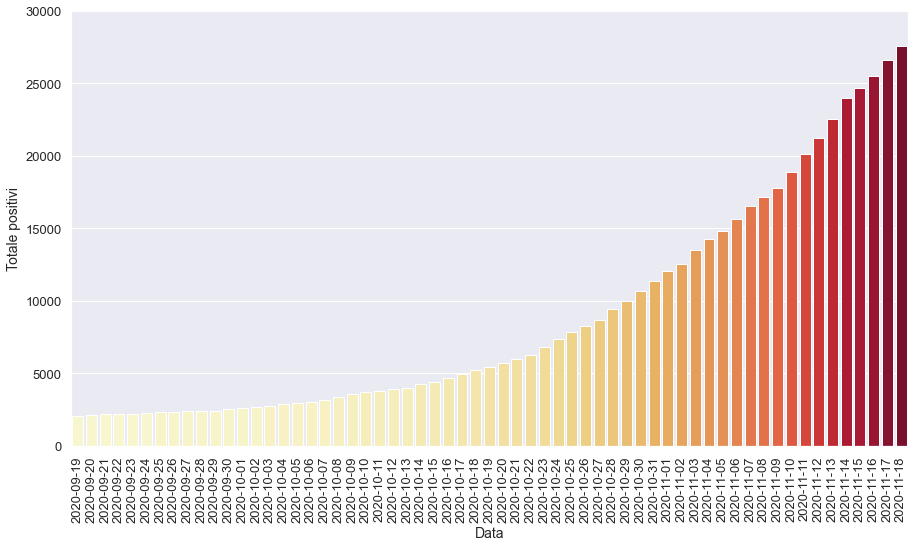

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

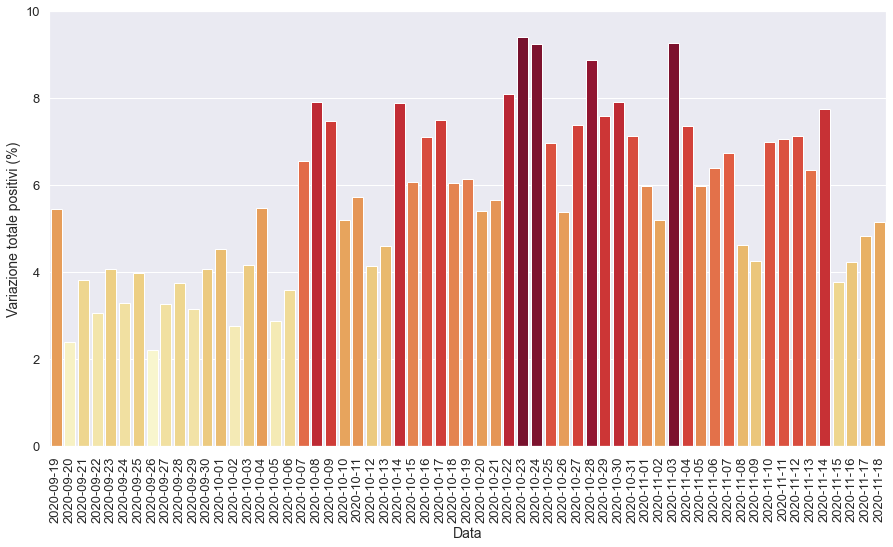

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

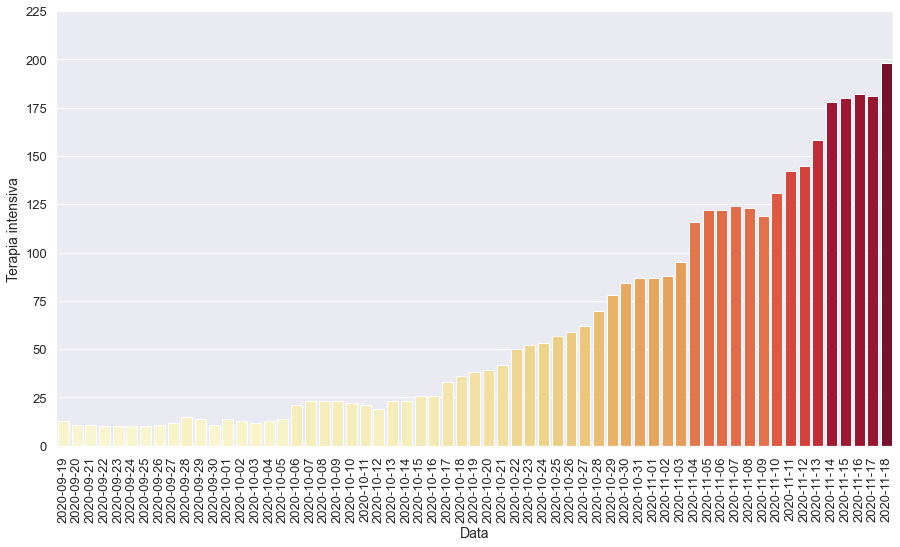

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

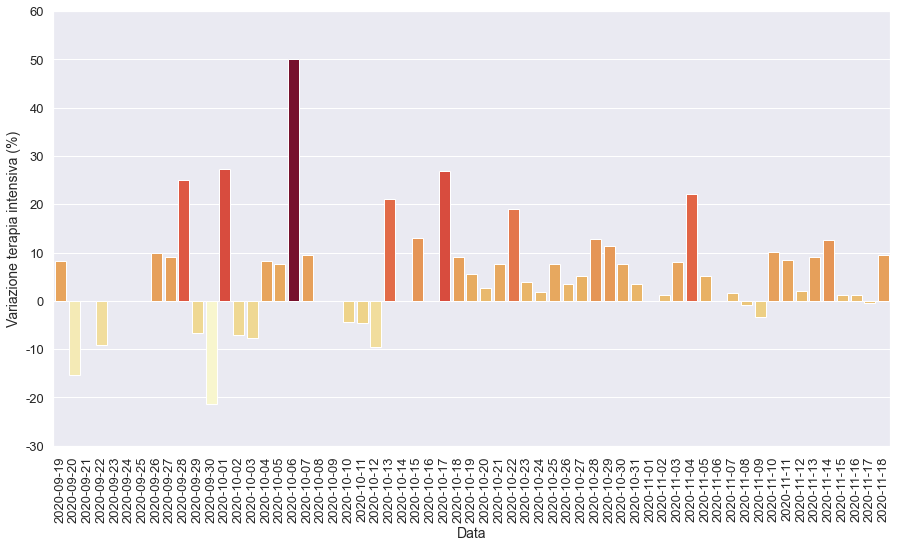

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

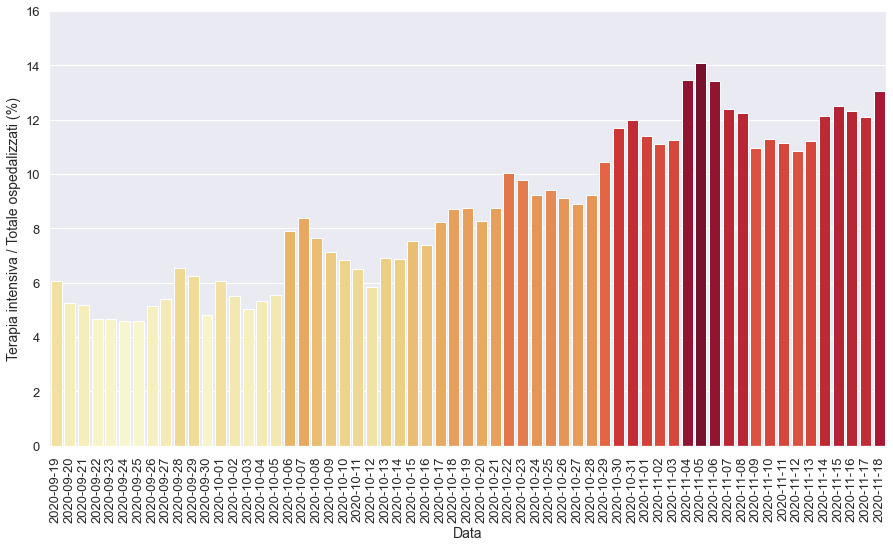

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

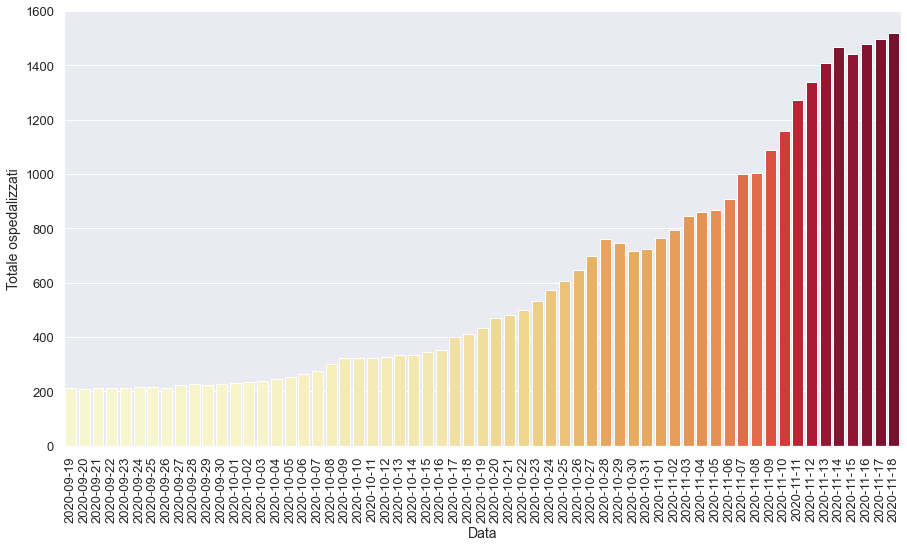

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

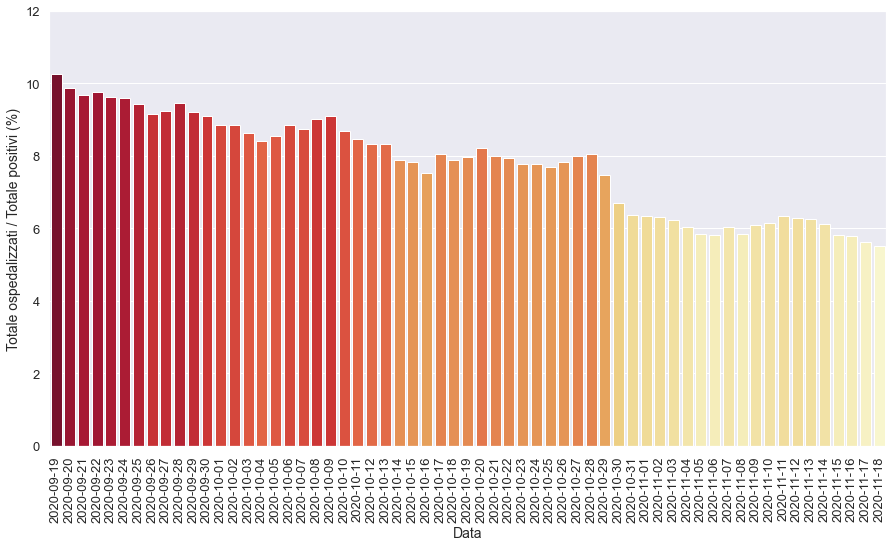

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

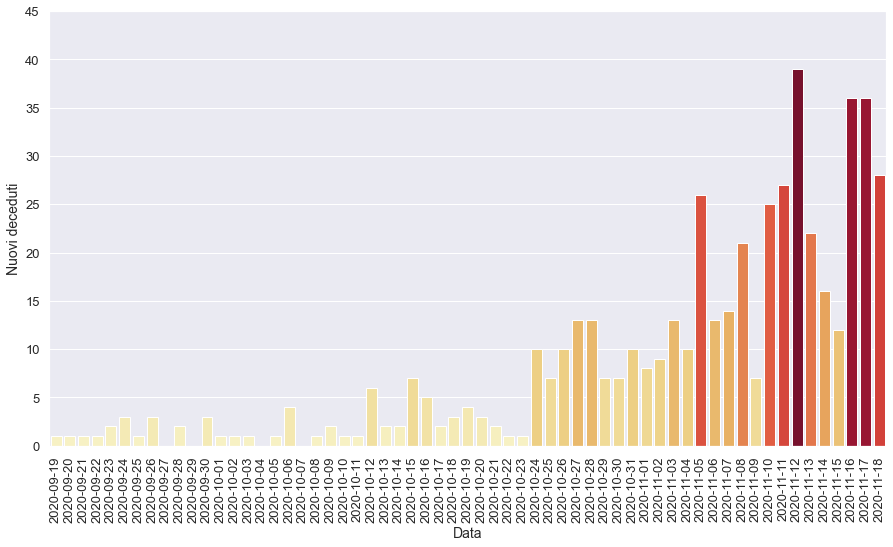

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

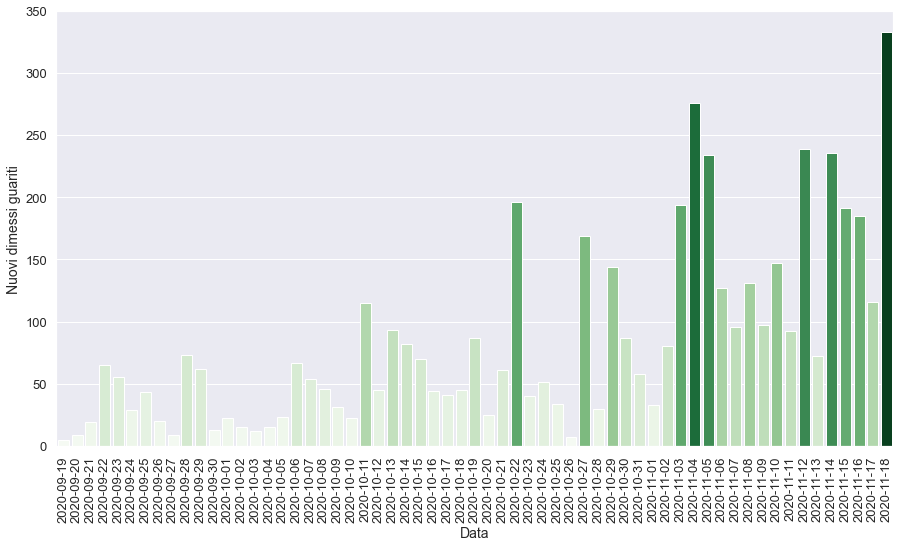

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-19T17:00:00,16,Puglia,397,38,435,5028,5463,230,321,...,4.0,2446.0,2098.0,208.0,8.74,7.96,13.12,15.30,5.56,6.134
1,2020-10-20T17:00:00,16,Puglia,432,39,471,5259,5730,267,295,...,3.0,5827.0,4471.0,231.0,8.28,8.22,5.06,6.60,2.63,5.400
2,2020-10-21T17:00:00,16,Puglia,438,42,480,5511,5991,261,324,...,2.0,5300.0,4620.0,252.0,8.75,8.01,6.11,7.01,7.69,5.654
3,2020-10-22T17:00:00,16,Puglia,448,50,498,5781,6279,288,485,...,1.0,5651.0,3951.0,270.0,10.04,7.93,8.58,12.28,19.05,8.095
4,2020-10-23T17:00:00,16,Puglia,479,52,531,6297,6828,549,590,...,1.0,5253.0,5008.0,516.0,9.79,7.78,11.23,11.78,4.00,9.396
5,2020-10-24T17:00:00,16,Puglia,522,53,575,6823,7398,570,631,...,10.0,5339.0,3140.0,526.0,9.22,7.77,11.82,20.10,1.92,9.241
6,2020-10-25T17:00:00,16,Puglia,548,57,605,7267,7872,474,515,...,7.0,4377.0,3151.0,444.0,9.42,7.69,11.77,16.34,7.55,6.961
7,2020-10-26T17:00:00,16,Puglia,589,59,648,7631,8279,407,424,...,10.0,3057.0,1786.0,364.0,9.10,7.83,13.87,23.74,3.51,5.386
8,2020-10-27T17:00:00,16,Puglia,635,62,697,8011,8708,429,611,...,13.0,5147.0,4727.0,380.0,8.90,8.00,11.87,12.93,5.08,7.380
9,2020-10-28T17:00:00,16,Puglia,690,70,760,8677,9437,729,772,...,13.0,6437.0,5934.0,666.0,9.21,8.05,11.99,13.01,12.90,8.865


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

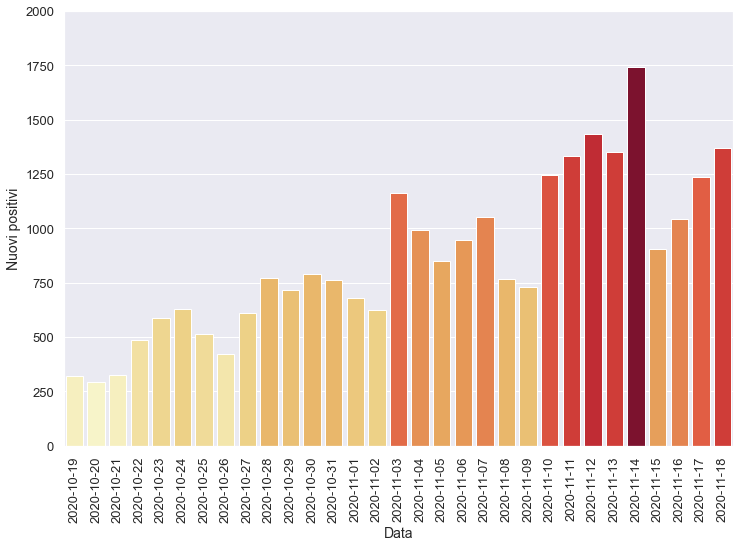

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

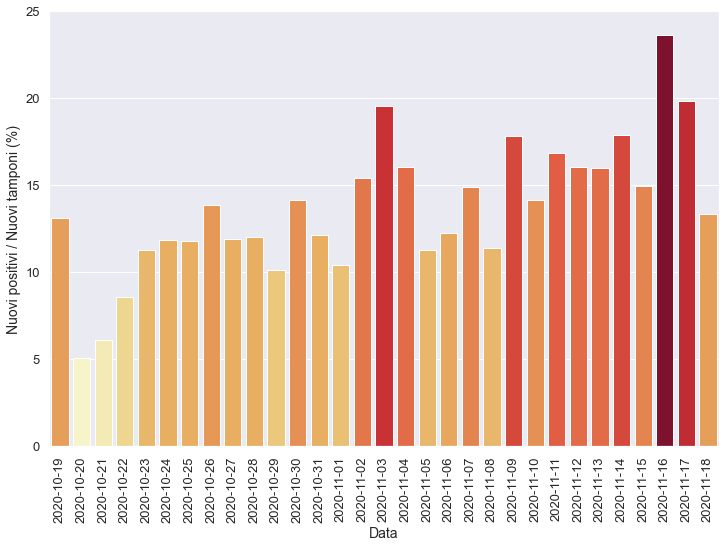

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

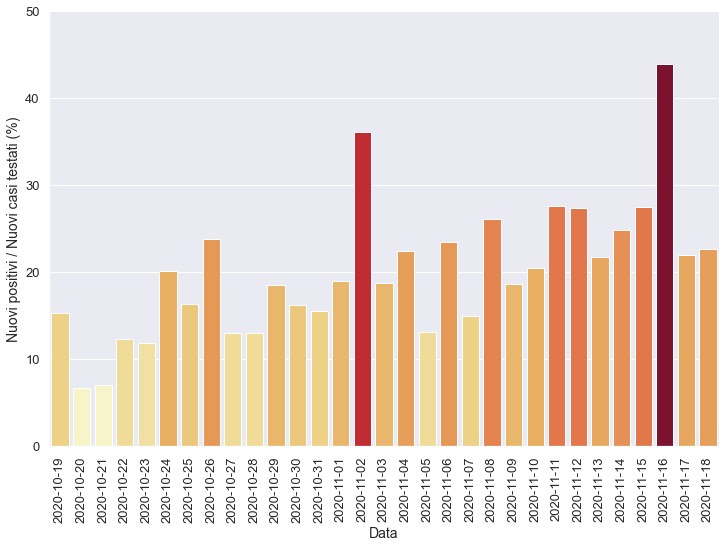

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

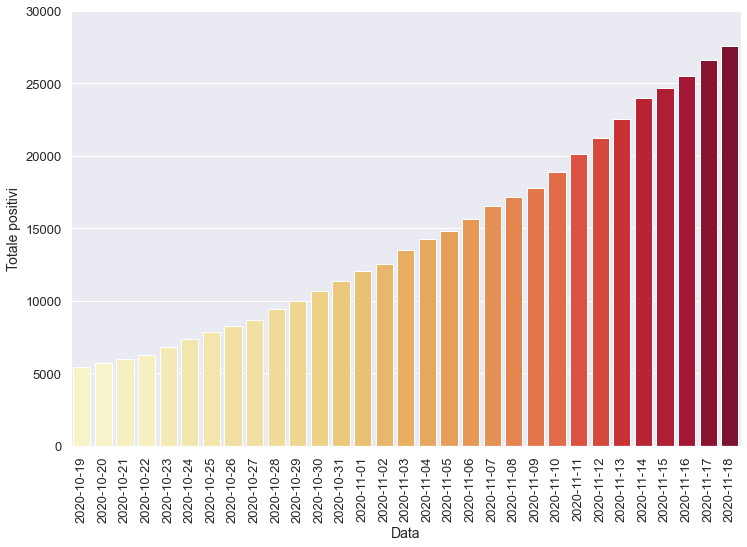

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

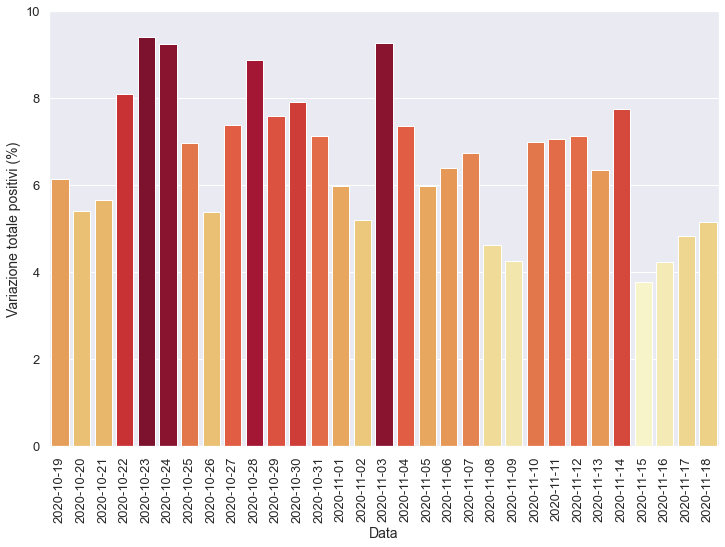

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

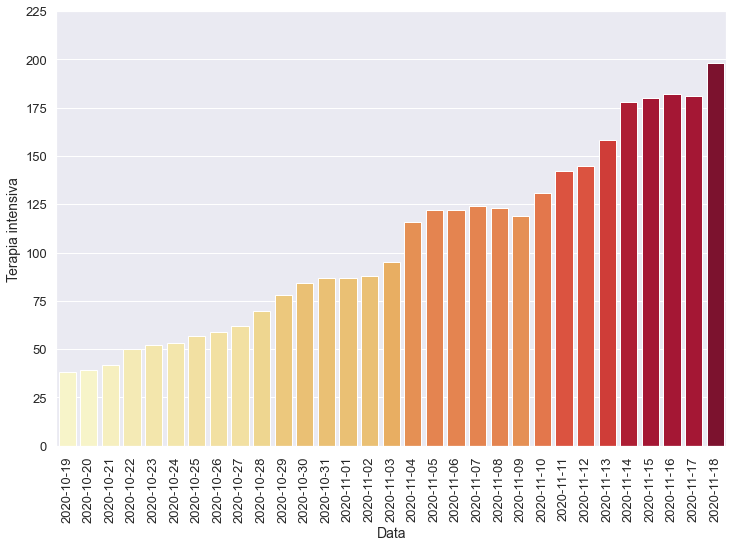

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

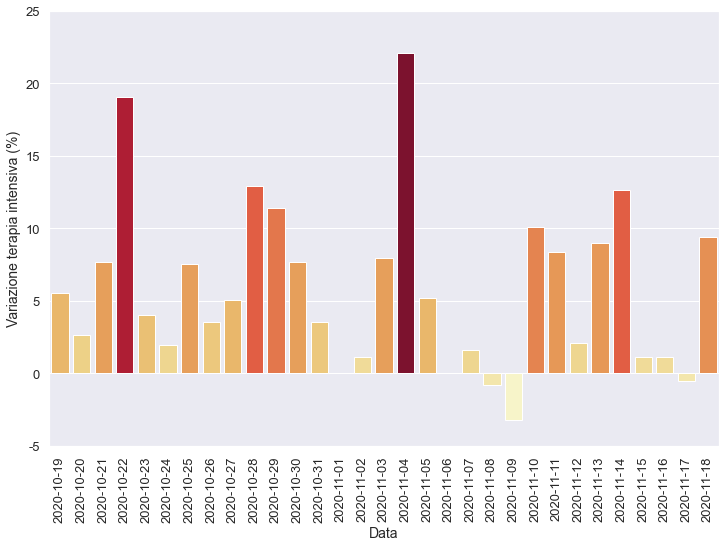

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

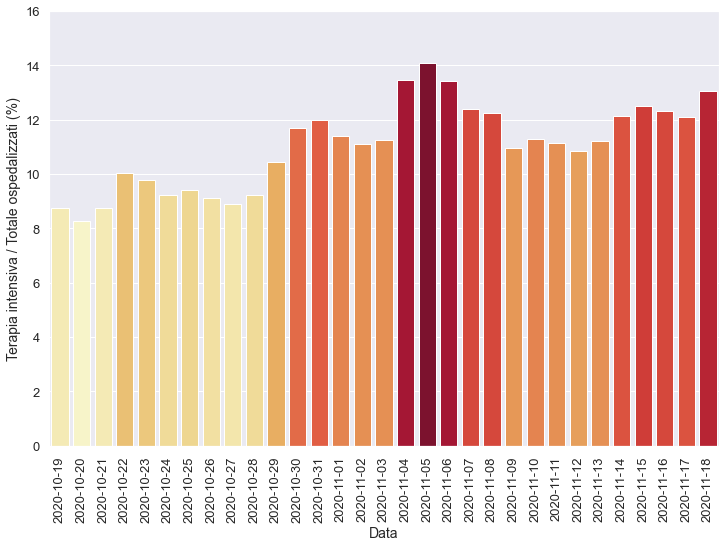

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

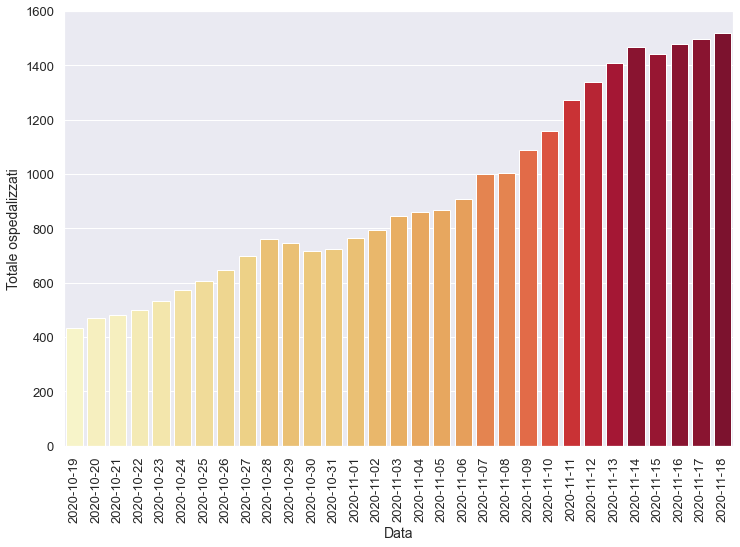

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

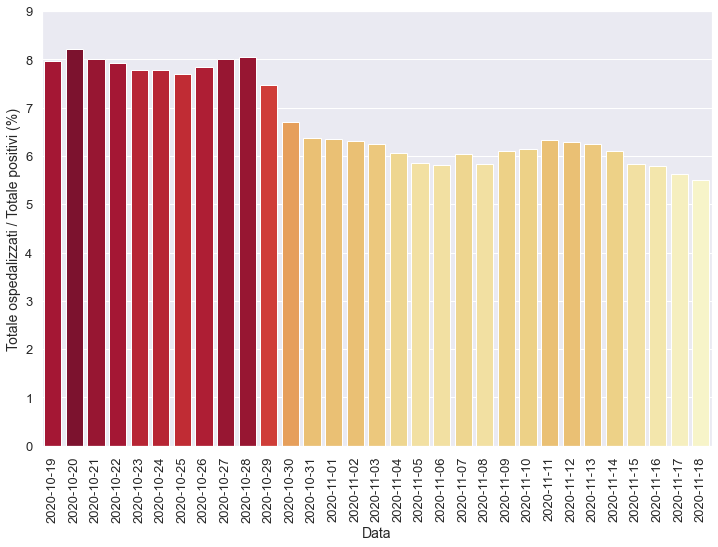

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

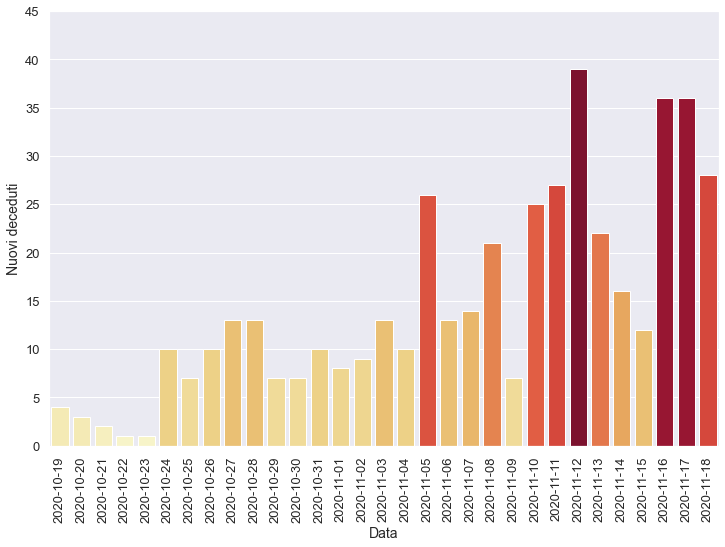

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

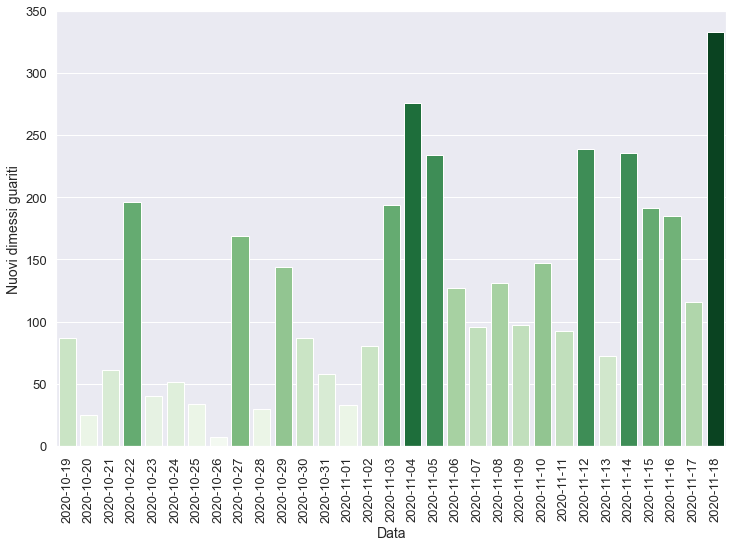

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-11T17:00:00,16,Puglia,1131,142,1273,18826,20099,1213,1332,...,27.0,7913.0,4836.0,1100.0,11.15,6.33,16.83,27.54,8.40,7.053
1,2020-11-12T17:00:00,16,Puglia,1193,145,1338,19917,21255,1156,1434,...,39.0,8936.0,5248.0,1091.0,10.84,6.29,16.05,27.32,2.11,7.135
2,2020-11-13T17:00:00,16,Puglia,1249,158,1407,21104,22511,1256,1350,...,22.0,8461.0,6223.0,1187.0,11.23,6.25,15.96,21.69,8.97,6.351
3,2020-11-14T17:00:00,16,Puglia,1289,178,1467,22533,24000,1489,1741,...,16.0,9745.0,7020.0,1429.0,12.13,6.11,17.87,24.80,12.66,7.734
4,2020-11-15T17:00:00,16,Puglia,1261,180,1441,23261,24702,702,905,...,12.0,6070.0,3292.0,728.0,12.49,5.83,14.91,27.49,1.12,3.771
5,2020-11-16T17:00:00,16,Puglia,1295,182,1477,24048,25525,823,1044,...,36.0,4425.0,2381.0,787.0,12.32,5.79,23.59,43.85,1.11,4.226
6,2020-11-17T17:00:00,16,Puglia,1316,181,1497,25110,26607,1082,1234,...,36.0,6228.0,5638.0,1062.0,12.09,5.63,19.81,21.89,-0.55,4.834
7,2020-11-18T17:00:00,16,Puglia,1320,198,1518,26096,27614,1007,1368,...,28.0,10265.0,6047.0,986.0,13.04,5.50,13.33,22.62,9.39,5.142


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

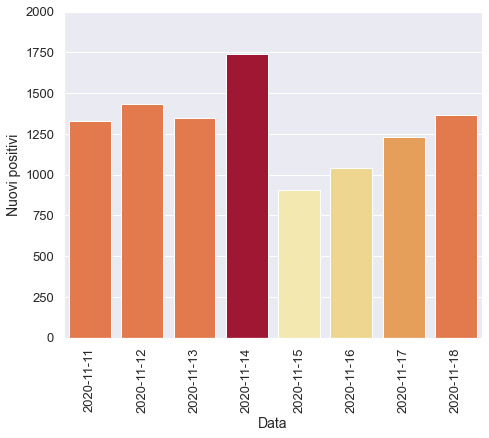

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

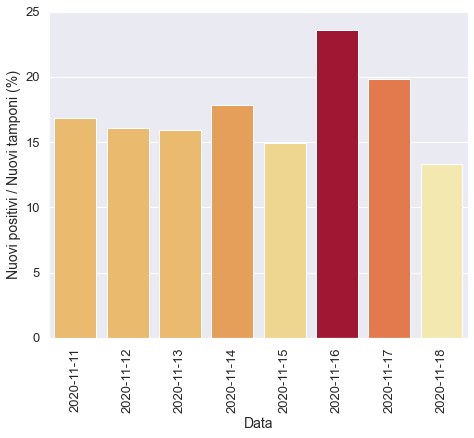

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

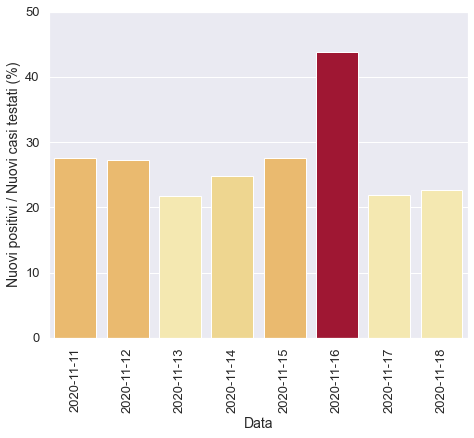

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

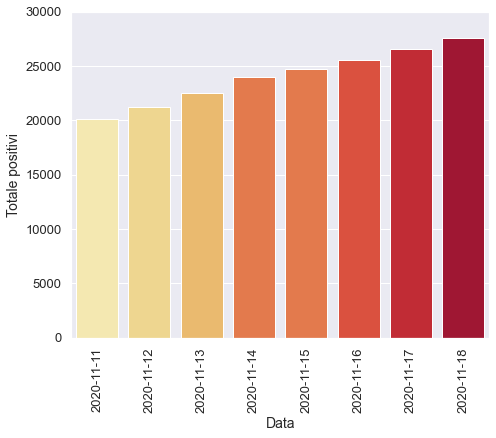

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

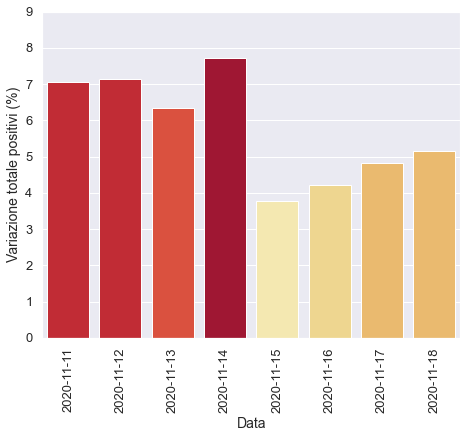

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

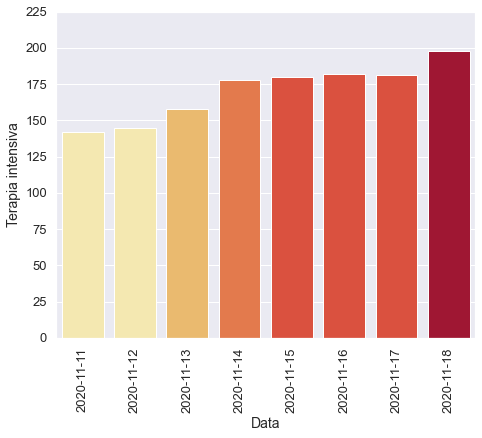

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

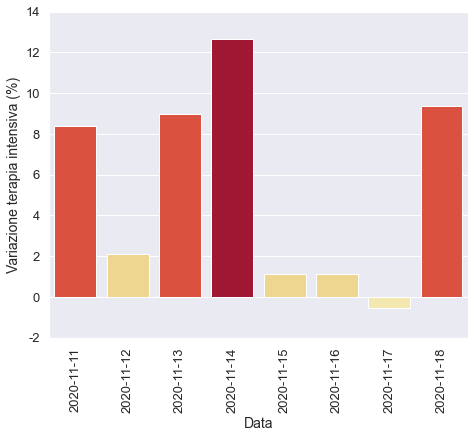

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

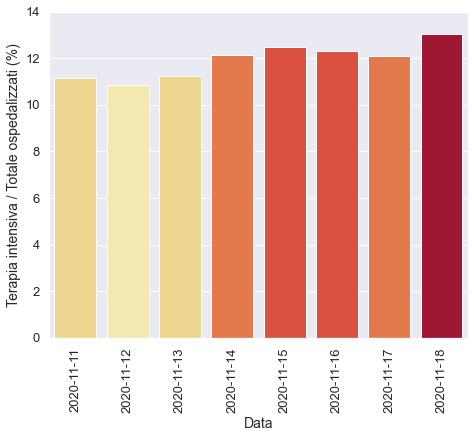

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

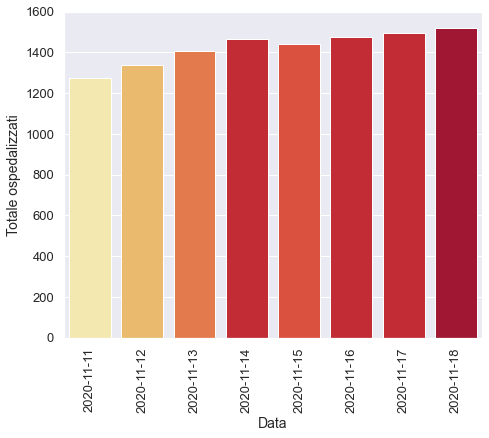

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

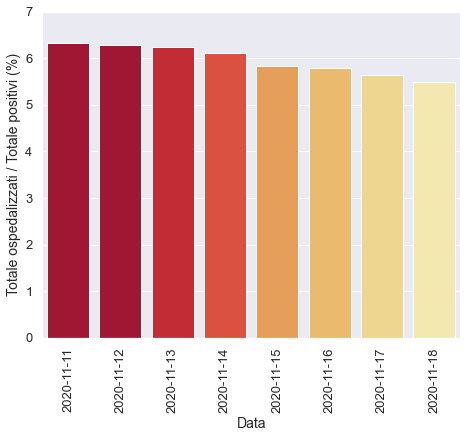

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

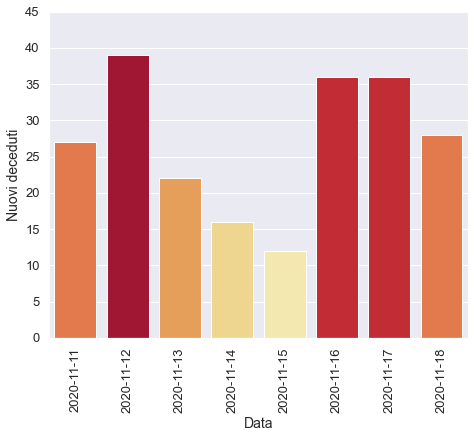

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

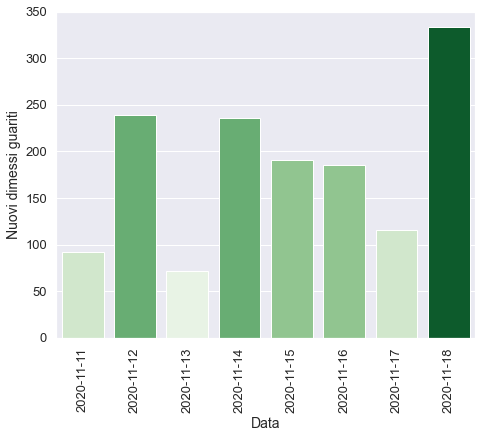

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)